In [17]:
import numpy as np
import yfinance as yf
import pandas as pd 
import time
import matplotlib.pyplot as plt  
import scipy
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
features = yf.download("SB=F CC=F KC=F HG=F PL=F ALI=F SI=F GC=F NG=F CL=F",start="2015-01-01",end="2020-08-31")
features.fillna(method='bfill', inplace=True)
features = features.dropna()
features.tail()
# SB=F Sugar 
# CC=F Cocoa 
# KC=F Coffee 

# HG=F Copper 
# PL=F Platinum
# ALI=F Aluminum 

# SI=F Silver 
# GC=F Gold

# NG=F Natural Gas
# CL=F Crude Oil


[*********************100%***********************]  10 of 10 completed


Adj Close                                                      \
               ALI=F    CC=F       CL=F         GC=F    HG=F        KC=F   
Date                                                                       
2020-08-24   1741.00  2509.0  42.619999  1927.699951  2.9225  120.250000   
2020-08-25   1745.50  2537.0  43.349998  1911.800049  2.9310  123.199997   
2020-08-26   1744.75  2526.0  43.389999  1940.699951  2.9595  122.800003   
2020-08-27   1746.25  2560.0  43.040001  1921.599976  2.9650  122.949997   
2020-08-28   1790.00  2692.0  42.970001  1964.599976  2.9950  127.099998   

                                                 ... Volume             \
             NG=F        PL=F   SB=F       SI=F  ...  ALI=F       CC=F   
Date                                             ...                     
2020-08-24  2.513  920.799988  12.71  26.587999  ...    0.0        0.0   
2020-08-25  2.489  930.599976  12.76  26.254000  ...    0.0       15.0   
2020-08-26  2.461  936.400024  12.58  27.430000  ...    0.0        0.0   
2020-08-27  2.579  925.599976  12.77  27.010000  ...    0.0  4188763.0   
2020-08-28  2.657  940.700012  12.60  27.610001  ...    6.0       24.0   

                                                                            \
                CL=F    GC=F     HG=F   KC=F      NG=F       PL=F     SB=F   
Date                                                                         
2020-08-24  294731.0    85.0    377.0  119.0  101297.0        0.0  57126.0   
2020-08-25  330800.0   176.0    347.0   55.0   43866.0        0.0  47148.0   
2020-08-26  262243.0   287.0    315.0   72.0   37633.0        1.0  51531.0   
2020-08-27  320968.0  2303.0  45428.0   13.0  209678.0        0.0  50487.0   
2020-08-28  272800.0   778.0  13122.0   54.0  152901.0  5089689.0  41530.0   

                      
                SI=F  
Date                  
2020-08-24       3.0  
2020-08-25      27.0  
2020-08-26      13.0  
2020-08-27  131415.0  
2020-08-28    9048.0  

[5 rows x 60 columns]

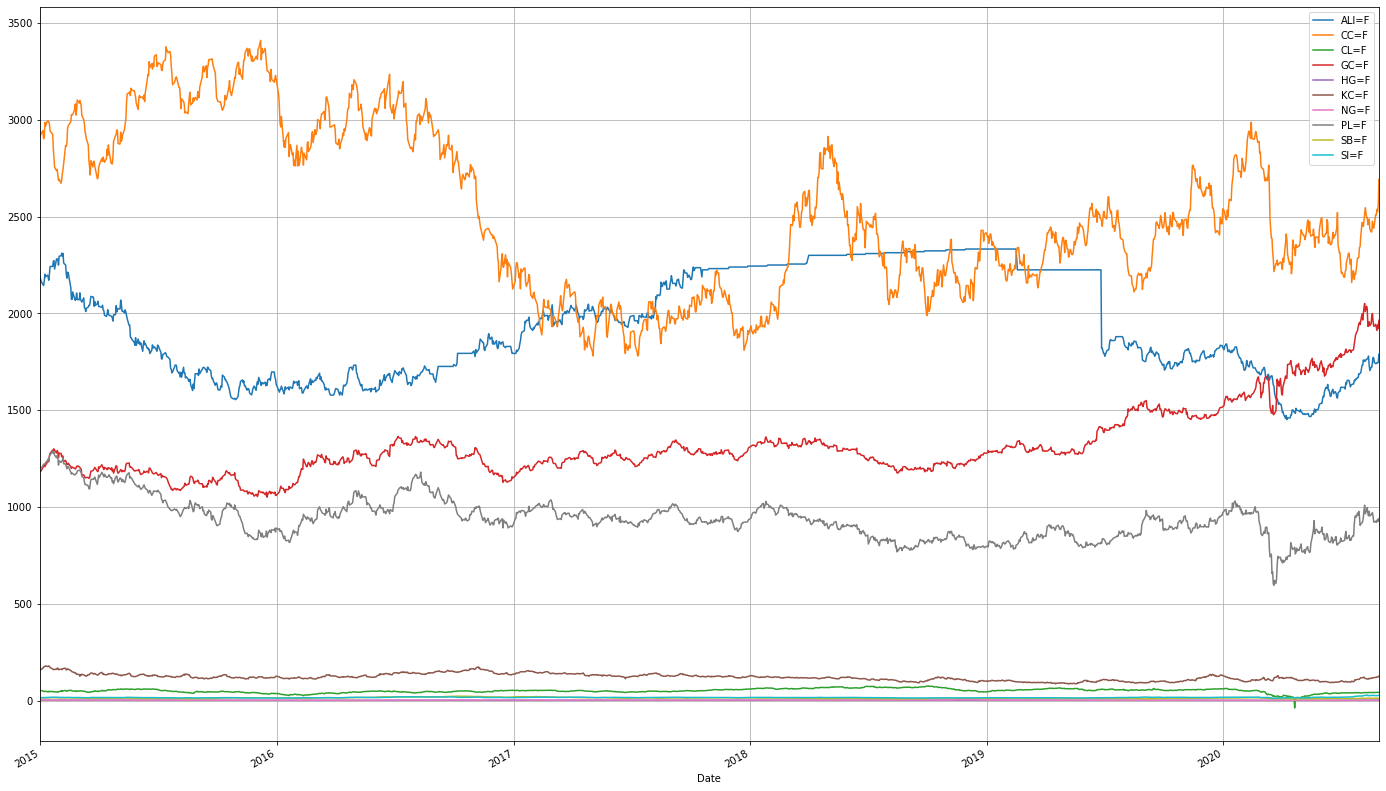

In [25]:
pylab.rcParams['figure.figsize'] = (24, 15) 
features["Adj Close"].plot(grid = True)

In [26]:
stocks = yf.download("SBUX AAPL INTC GE VALE TWTR AAL TSLA DIS BABA",start="2015-01-01",end="2020-08-31")
stocks.fillna(method='bfill', inplace=True)
stocks = stocks.dropna()
stocks.tail()
# SBUX Starbucks Corporation

# AAPL Apple
# INTC Intel

# GE General Electric Company
# VALE Vale S.A.

# TWTR Twitter

# AAL American Airlines Group
# TSLA Tesla

# DIS The Walt Disney Company

# BABA Alibaba Group Holding Limited

[*********************100%***********************]  10 of 10 completed


Adj Close                                                           \
                 AAL        AAPL        BABA         DIS        GE       INTC   
Date                                                                            
2020-08-24     13.44  125.857498  276.019989  130.690002  6.619060  49.139999   
2020-08-25     13.14  124.824997  286.000000  129.789993  6.579125  49.430000   
2020-08-26     12.79  126.522499  291.959991  132.179993  6.469307  49.549999   
2020-08-27     13.28  125.010002  284.170013  133.729996  6.469307  49.400002   
2020-08-28     13.59  124.807503  289.000000  135.539993  6.599092  50.430000   

                                                         ...     Volume  \
                 SBUX        TSLA       TWTR       VALE  ...        AAL   
Date                                                     ...              
2020-08-24  78.680000  402.839996  40.490002  10.836020  ...  102685700   
2020-08-25  82.720001  404.667999  40.549999  10.759305  ...   79053400   
2020-08-26  82.410004  430.634003  41.080002  10.596285  ...   44056800   
2020-08-27  83.410004  447.750000  40.389999  10.481213  ...  108835700   
2020-08-28  85.000000  442.679993  41.070000  10.836020  ...   54516400   

                                                                          \
                 AAPL      BABA       DIS         GE      INTC      SBUX   
Date                                                                       
2020-08-24  345937600  22475800   7613600  102785400  36295300   5867400   
2020-08-25  211495600  27535500   5494400   69449100  38384300  17659500   
2020-08-26  163022400  19530300   8447800   57304000  28616600   7934300   
2020-08-27  155552400  14805800  13667600   73387900  24420600   9099200   
2020-08-28  187630000   9689600  11020100   59161700  35384700   9303900   

                                           
                 TSLA      TWTR      VALE  
Date                                       
2020-08-24  100318000  20496600  20285500  
2020-08-25   53294500  12470500  23660100  
2020-08-26   71197000  12532500  26074600  
2020-08-27  118465000  13055000  16175300  
2020-08-28  100406000   8033800  16052000  

[5 rows x 60 columns]

# Stocks Adj close

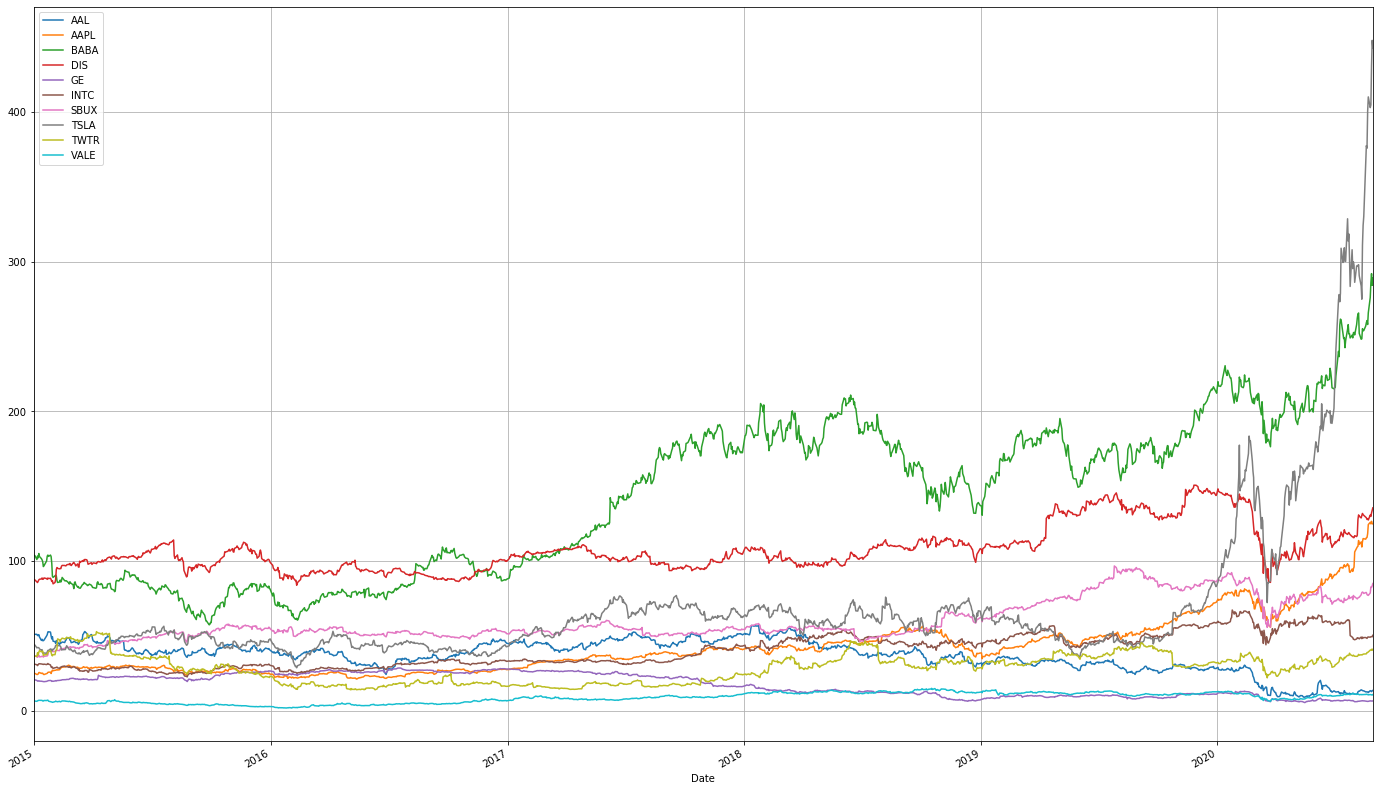

In [27]:
pylab.rcParams['figure.figsize'] = (24, 15) 
stocks["Adj Close"].plot(grid = True)

# Asset return (Stocks)

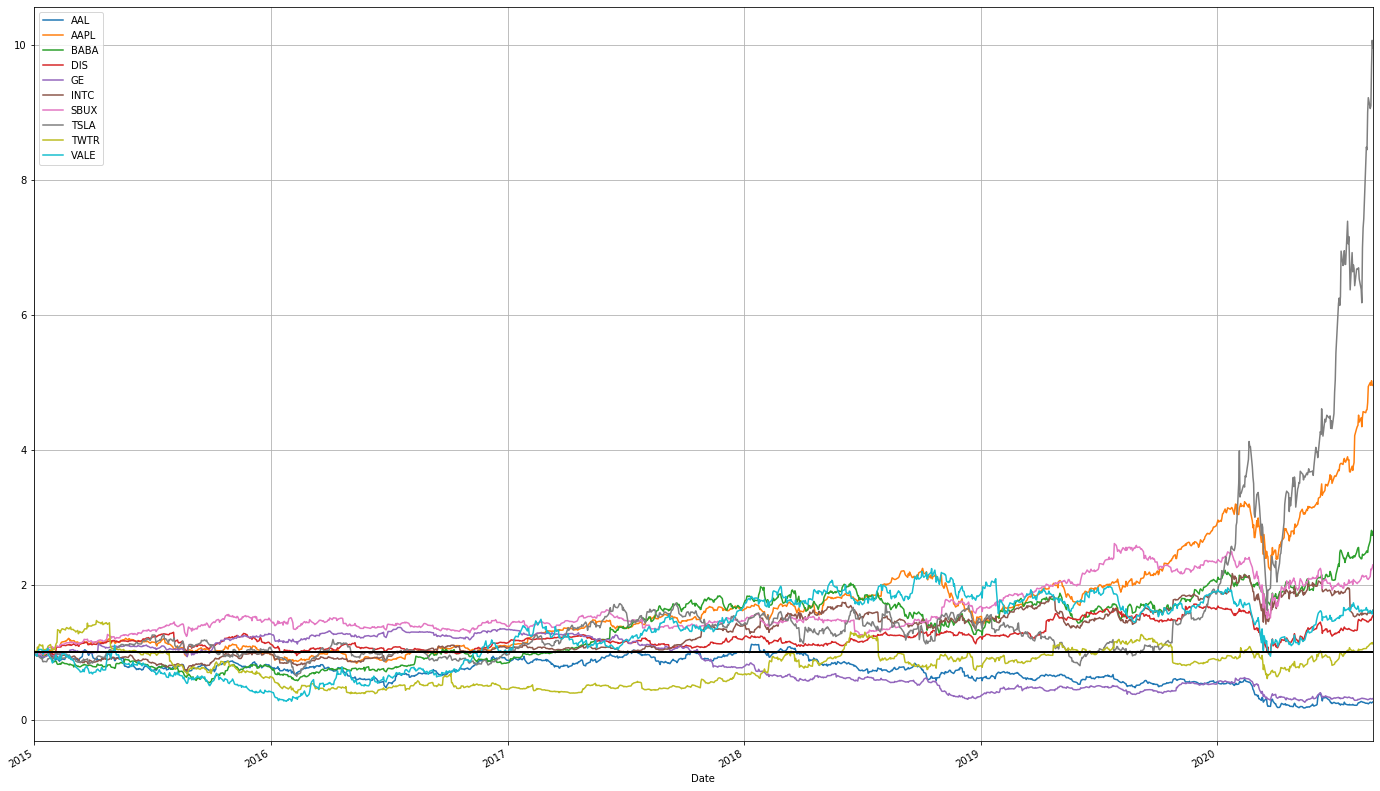

In [29]:
asset_return = stocks.apply(lambda x: x / x[0])
asset_return["Adj Close"].plot(grid = True).axhline(y = 1, color = "black", lw = 2)

# Correlation

In [106]:
stocks_adj_close = stocks["Adj Close"]
features_adj_close = features["Adj Close"]
stocks_adj_close_cor = pd.concat([stocks_adj_close, features_adj_close], axis=1).corr()

stocks_adj_close_cor[["SBUX" ,"AAPL","INTC" ,"GE", "VALE" ,"TWTR" ,"AAL", "TSLA" ,"DIS", "BABA" ]].ix[["SB=F" ,"CC=F", "KC=F", "HG=F" ,"PL=F" ,"ALI=F", "SI=F", "GC=F", "NG=F" ,"CL=F"]]

# "SBUX AAPL INTC GE VALE TWTR AAL TSLA DIS BABA"
# "SB=F CC=F KC=F HG=F PL=F ALI=F SI=F GC=F NG=F CL=F"



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


,SBUX,AAPL,INTC,GE,VALE,TWTR,AAL,TSLA,DIS,BABA
SB=F,-0.337894,-0.444885,-0.431146,0.687658,-0.404781,-0.598794,0.250771,-0.245855,-0.390157,-0.459864
CC=F,-0.201735,-0.316623,-0.387030,0.330286,-0.637312,0.133809,-0.074890,-0.167282,-0.196514,-0.546784
KC=F,-0.656385,-0.531382,-0.635017,0.743111,-0.523458,-0.390236,0.470320,-0.260462,-0.595100,-0.550667
HG=F,0.092715,0.341190,0.427356,-0.446046,0.742814,0.358399,0.285185,0.192750,0.263196,0.623208
PL=F,-0.474000,-0.423813,-0.552010,0.575185,-0.471465,0.020328,0.427449,-0.204084,-0.345756,-0.492206
ALI=F,-0.207507,-0.057461,0.164849,-0.274278,0.650421,0.250495,0.490485,-0.220182,0.012607,0.291755
SI=F,0.178794,0.408290,0.123478,0.009951,0.036312,-0.023430,-0.254353,0.598409,0.107265,0.282267
GC=F,0.684119,0.874390,0.713593,-0.628251,0.374792,0.242636,-0.762010,0.808201,0.477291,0.738044
NG=F,-0.409469,-0.368562,-0.250822,0.193242,0.219921,-0.123268,0.560459,-0.351255,-0.221618,-0.166391
CL=F,-0.009782,0.012060,0.216082,-0.218962,0.622948,0.343551,0.382973,-0.254883,0.286644,0.253606


# Stock return

In [51]:
stock_daily_returns = stocks['Adj Close'].pct_change(periods=1)
stock_monthly_returns = stocks['Adj Close'].resample('M').ffill().pct_change(periods=1)

In [52]:
stock_daily_returns

,AAL,AAPL,BABA,DIS,GE,INTC,SBUX,TSLA,TWTR,VALE
Date,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.005221,-0.009513,-0.003271,-0.004671,-0.008311,0.001929,-0.007435,-0.013938,0.019236,-0.029340
2015-01-05,-0.000557,-0.028172,-0.025097,-0.014613,-0.018355,-0.011276,-0.019155,-0.042041,-0.004923,-0.026448
2015-01-06,-0.015590,0.000094,0.022970,-0.005304,-0.021545,-0.018637,-0.008137,0.005664,0.065420,0.053040
2015-01-07,-0.000566,0.014022,-0.011518,0.010230,0.000415,0.020975,0.024612,-0.001562,-0.038184,0.024570
...,...,...,...,...,...,...,...,...,...,...
2020-08-24,0.105263,0.011960,0.038450,0.025502,0.050713,-0.002841,0.020890,-0.017454,0.031330,0.019856
2020-08-25,-0.022321,-0.008204,0.036157,-0.006887,-0.006033,0.005902,0.051347,0.004538,0.001482,-0.007080
2020-08-26,-0.026636,0.013599,0.020839,0.018414,-0.016692,0.002428,-0.003748,0.064166,0.013070,-0.015152


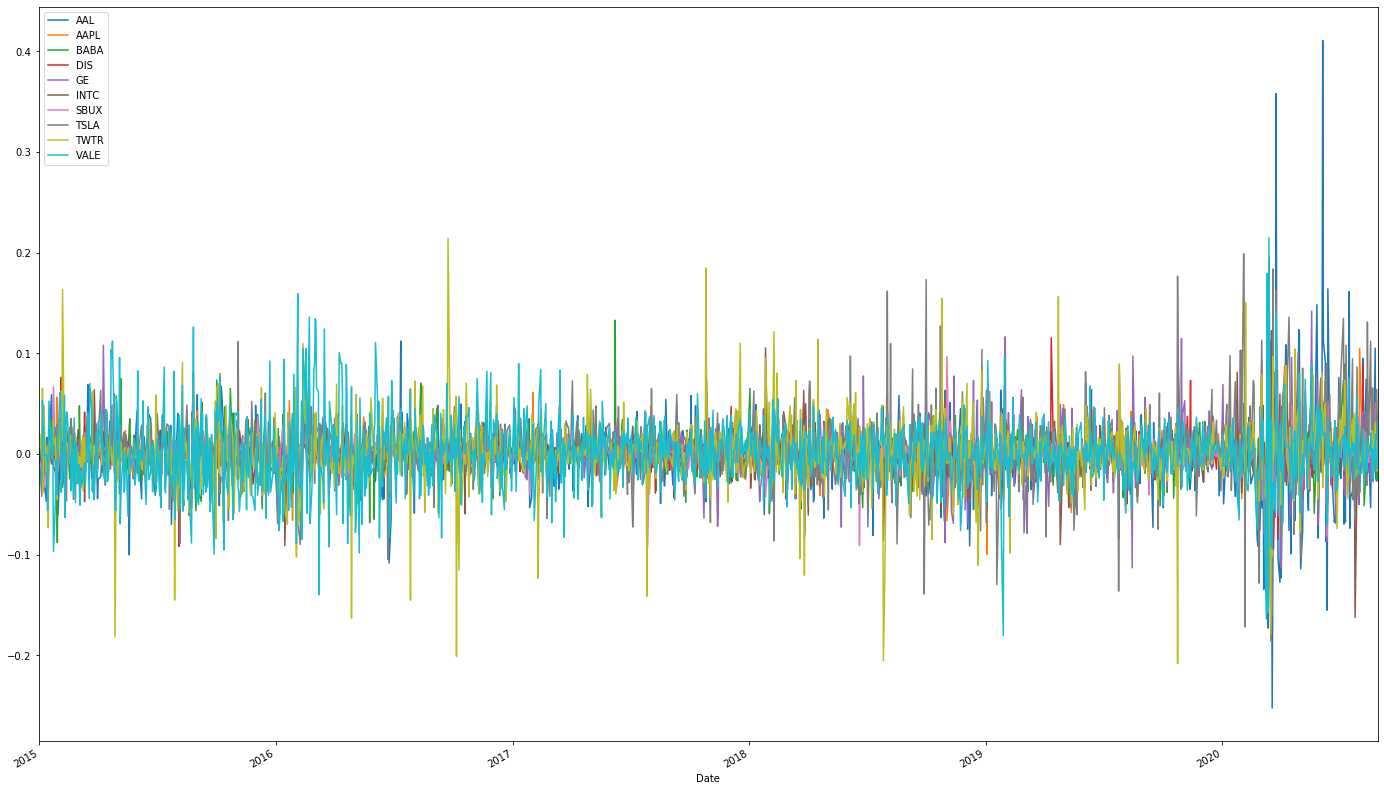

In [53]:
stock_daily_returns.plot()

In [56]:
stock_monthly_returns

,AAL,AAPL,BABA,DIS,GE,INTC,SBUX,TSLA,TWTR,VALE
Date,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-31,-0.084841,0.061424,-0.142967,-0.034293,-0.054610,-0.089557,0.066788,-0.084573,0.046278,-0.140587
2015-02-28,-0.022065,0.100776,-0.044454,0.144239,0.098308,0.013574,0.071990,-0.001277,0.281109,0.055477
2015-03-31,0.101879,-0.031372,-0.022087,0.007783,-0.045402,-0.059549,0.012943,-0.071653,0.041597,-0.238544
2015-04-30,-0.083195,0.005787,-0.023426,0.036514,0.091495,0.040934,0.047096,0.197489,-0.222045,0.403716
...,...,...,...,...,...,...,...,...,...,...
2020-04-30,-0.014766,0.155374,0.042112,0.119565,-0.143577,0.108278,0.167174,0.492137,0.167752,-0.004825
2020-05-31,-0.125729,0.085094,0.023289,0.084605,-0.033824,0.055110,0.022165,0.067939,0.079847,0.183030
2020-06-30,0.244762,0.147386,0.040069,-0.049361,0.041132,-0.049261,-0.056418,0.293186,-0.038101,0.056352


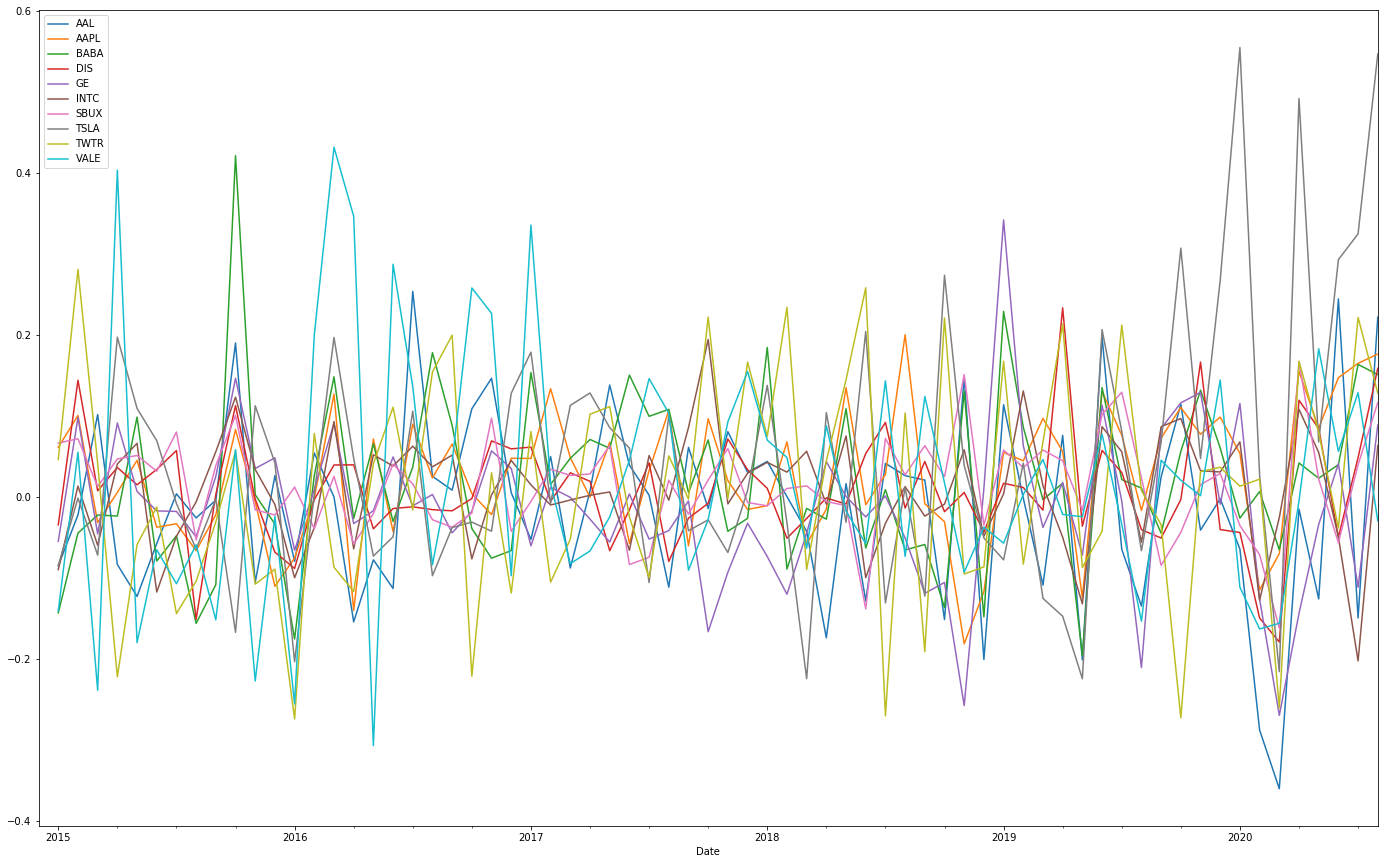

In [57]:
stock_monthly_returns.plot()

In [73]:
log_daily_returns = np.log(stocks['Adj Close']) - np.log(stocks['Adj Close'].shift(1))

In [74]:
log_daily_returns

,AAL,AAPL,BABA,DIS,GE,INTC,SBUX,TSLA,TWTR,VALE
Date,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.005207,-0.009558,-0.003277,-0.004682,-0.008345,0.001927,-0.007462,-0.014036,0.019054,-0.029779
2015-01-05,-0.000557,-0.028576,-0.025417,-0.014721,-0.018526,-0.011340,-0.019341,-0.042950,-0.004936,-0.026804
2015-01-06,-0.015713,0.000094,0.022710,-0.005318,-0.021780,-0.018813,-0.008170,0.005648,0.063370,0.051681
2015-01-07,-0.000566,0.013925,-0.011584,0.010178,0.000415,0.020758,0.024314,-0.001563,-0.038932,0.024273
...,...,...,...,...,...,...,...,...,...,...
2020-08-24,0.100083,0.011889,0.037729,0.025182,0.049469,-0.002845,0.020675,-0.017608,0.030849,0.019661
2020-08-25,-0.022574,-0.008238,0.035519,-0.006910,-0.006051,0.005884,0.050072,0.004528,0.001481,-0.007105
2020-08-26,-0.026997,0.013507,0.020625,0.018247,-0.016833,0.002425,-0.003755,0.062192,0.012986,-0.015268


# Indicators (AAPL Stock)

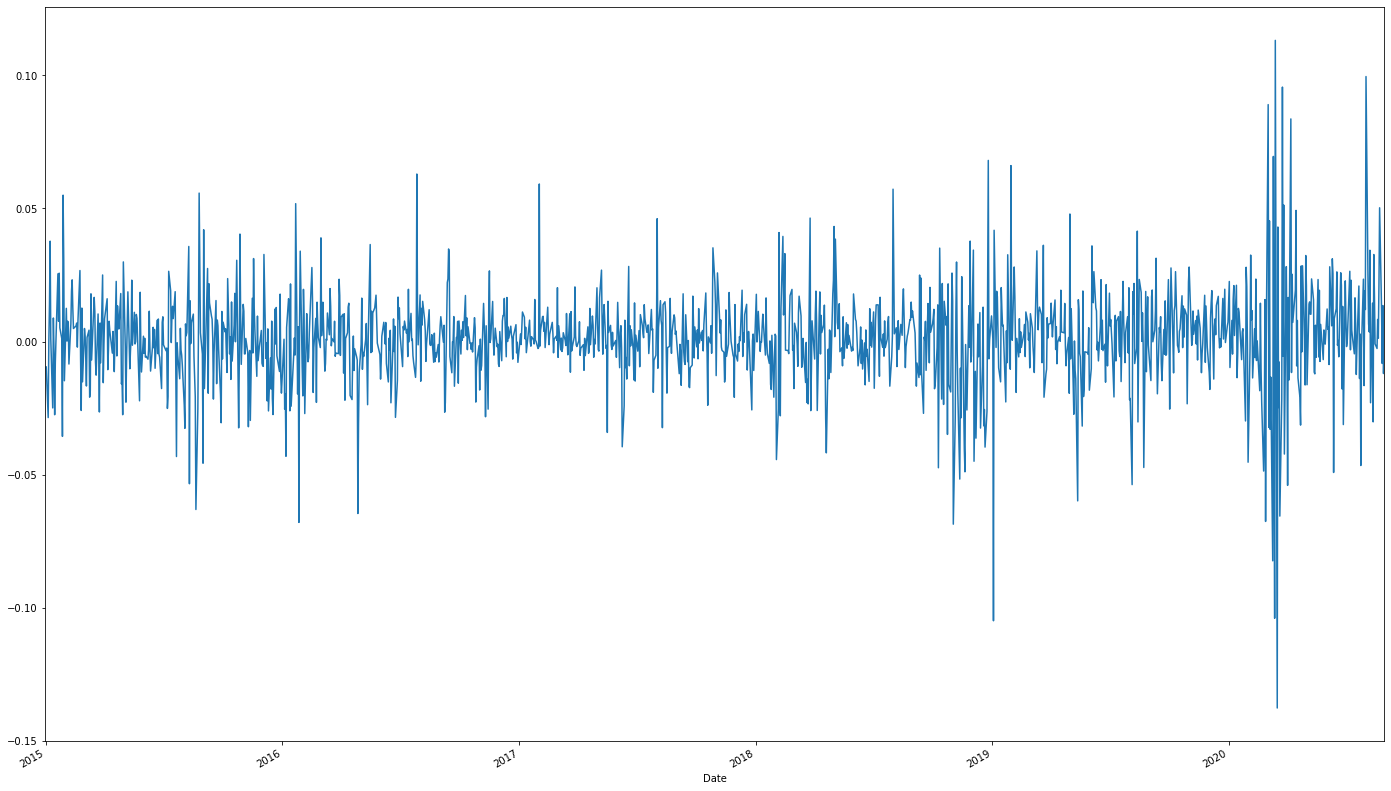

In [103]:
log_daily_returns["AAPL"].plot()

In [104]:
cumu_returns = log_daily_returns.cumsum()

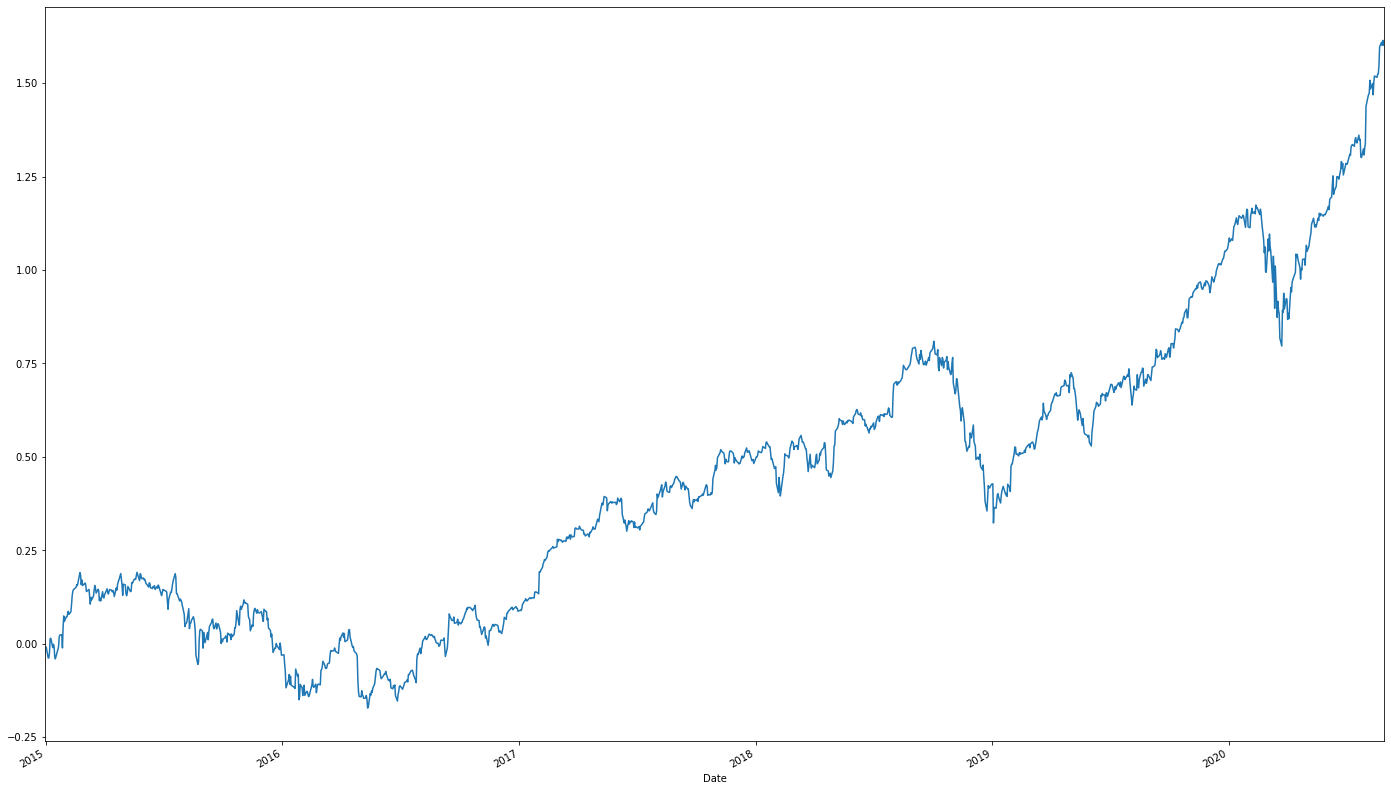

In [105]:
cumu_returns["AAPL"].plot()

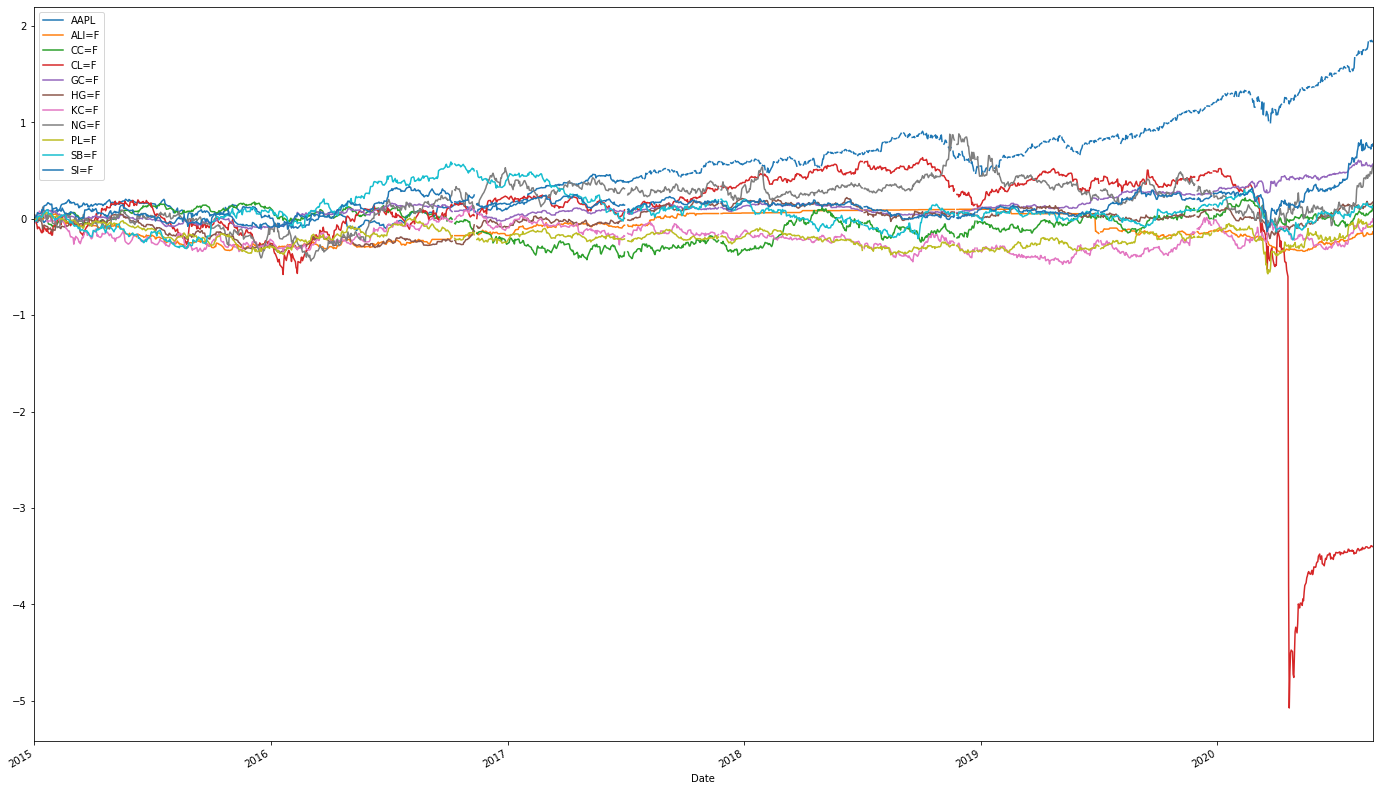

In [119]:
features_daily_returns = features['Adj Close'].pct_change(periods=1)
stocksAAPL_features_returns = pd.concat([stock_daily_returns["AAPL"], features_daily_returns], axis=1)
stocksAAPL_features_returns = stocksAAPL_features_returns.cumsum()
stocksAAPL_features_returns.plot()